
# Convolutional Neural Networks
---
Dataset used: Cats Vs. Dogs

---



---





In [ ]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import confusion_matrix

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

# Data loading and Preprocessing

---


The following blocks downloads the dataset stored at tensorflow and extracts them to be used to train the CNN model. **Please don't make any changes to these blocks below.**

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

The dataset has the following directory structure:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [ ]:
train_dir_path = os.path.join(PATH, 'train')
validation_dir_path = os.path.join(PATH, 'validation')

train_cats_dir_path = os.path.join(train_dir_path, 'cats')  
train_dogs_dir_path = os.path.join(train_dir_path, 'dogs') 
validation_cats_dir_path = os.path.join(validation_dir_path, 'cats')  
validation_dogs_dir_path = os.path.join(validation_dir_path, 'dogs')  

## Create a labelled test set from the validation set
As you would have seen we have only training and validation sets with labels as the ground truth labels for the Kaggle contest test set images is not public. Hence we shall consider 10% of validation data (5% Cats, 5% Dogs)  as our test set. 


In [ ]:
# Create a test directory with the same Cats and Dogs sub directory structure 
test_dir_path = os.path.join(PATH, 'labelled_test')
if not  os.path.exists(test_dir_path):
    os.makedirs(test_dir_path)
test_cats_dir_path = os.path.join(test_dir_path,'cats')
test_dogs_dir_path = os.path.join(test_dir_path,'dogs')
if not os.path.exists(test_cats_dir_path):
    os.makedirs(test_cats_dir_path)
if not os.path.exists(test_dogs_dir_path):
    os.makedirs(test_dogs_dir_path)

# Randomly pick 5% of validation Cat Images 
val_cat_list = os.listdir(validation_cats_dir_path)
num_cat_test_files = int(0.05 * len(val_cat_list))
chosen_cats = random.sample(val_cat_list,num_cat_test_files)

# Randomly pick 5% of validation Dog Images 
val_dog_list = os.listdir(validation_dogs_dir_path)
num_dog_test_files = int(0.05 * len(val_dog_list))
chosen_dogs = random.sample(val_dog_list,num_dog_test_files)

# Move the selected Cat Images from Validation Cats directory to Test Cats directory 
for cat in chosen_cats:
    src_path = os.path.join(validation_cats_dir_path,cat)
    if not os.path.exists(os.path.join(test_cats_dir_path,cat)):
        shutil.move(src_path,test_cats_dir_path)

# Move the selected Dog Images from Validation Dogs directory to Test Dogs directory 
for dog in chosen_dogs:
    src_path = os.path.join(validation_dogs_dir_path,dog)
    if not os.path.exists(os.path.join(test_dogs_dir_path,dog)):
        shutil.move(src_path,test_dogs_dir_path)  


In [ ]:
num_cats_train =  len(os.listdir(train_cats_dir_path))
num_dogs_train =  len(os.listdir(train_dogs_dir_path))
num_cats_val =  len(os.listdir(validation_cats_dir_path))
num_dogs_val =  len(os.listdir(validation_dogs_dir_path))
num_cats_test =  len(os.listdir(test_cats_dir_path))
num_dogs_test =  len(os.listdir(test_dogs_dir_path))

total_train_data = num_cats_train + num_dogs_train
total_val_data = num_cats_val + num_dogs_val
total_test_data = num_cats_test + num_dogs_test

The images are of different sizes, but our machine learning model requires input images to be of a fixed size. Let us decide an input size 200 x 200.

In [ ]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Generate Image Batches


---


As images are high dimensional, fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**5 Points**

---

**featurewise_center** - It takes boolean values. It sets mean 0 for the entire dataset feature-wise.

**samplewise_center** - It takes boolean values. It sets mean 0 for each sample.

**featurewise_std_normalization** - (Boolean inputs) Divides input by standard deviation of the dataset featurewise.

**samplewise_std_normalization** - (Boolean inputs) Divides input by its standard deviation.

**zca_epsilon** - epsilon for zca whitening.By default value is 1e-6.

**zca_whitening** - (Boolean inputs) Apply zca whitening.

**rotation_range** - (Integer inputs) Degree range for random rotations.

**width_shift_range** -(Float,1D array like, integer) 

float: fraction of total width, if <1, or pixels if >=1.

1D array-like : random elements from the array

int: integer number of pixels from interval (-width_shift_range,+width_shift_range)

**height_shift_range** - -(Float,1D array like, integer) 

float: fraction of total height, if <1, or pixels if >=1.

1D array-like : random elements from the array

int: integer number of pixels from interval (-height_shift_range,+height_shift_range)

**brightness_range** - (Tuple or list of two floats). Range of values for picking a brightness shift value.

**shear_range** - (Float) Shear angle in counter-clockwise direction in degrees.

**zoom_range** - (Float or [lower,upper]) Range for random zoom
**channel_shift_range** - (Float) Range for random channel shifts.

**fill_mode** - {"constant","nearest","reflect","wrap"}.By default it is 'nearest'. Outliers are filled accordingly:

'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)

'nearest': aaaaaaaa|abcd|dddddddd

'reflect': abcddcba|abcd|dcbaabcd

'wrap': abcdabcd|abcd|abcdabcd

**cval** -(Float/int) Value used for outliers, when fill_mode="constant"

**horizontal_flip** - (Boolean) Randomly flips inputs horizontally.

**vertical_flip** - (Boolean) Randomly flips inputs vertically.

**rescale** - rescaling factor. Defaults to none. If none or 0 rescaling is applied, otherwise the data is multiplied by the value given.

**preprocessing_function** - This function will applied over all inputs.

**data_format** - Determines the image data format (shape).

**validation_split** - (Float) Fraction of images reserved for validation.

**dtype** - To generate arrays.


Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**5 Points**

---
**directory** - (string) path to target directory.

**target_size** - (tuple of 2 integer which represent height and weight). Default is is (256,256).

**color_mode** - {'grayscale', 'rgb', 'rgba'} - Default is 'rgb'. The image will be converted to have 1,3 or 4 channels.

**classes** - optional list of class subdirectories. Default is none.

**class_mode** - {"categorical","binary","sparse","input",None} By default it is none.

**batch_size** -(int) size of the batches of data.

**shuffle** - (boolean) whether to shuffle data.

**seed** - Optional random seed for shuffling and transformation.

**save_to_dir** - (None or str) To optinally save in the specified directory.

**save_prefix** - (str) prefix to be used for filenames while saving the pictures.

**save_format** - {'png', 'jpeg'} which format the image is to be saved in.

**follow_links** - (Boolean) Whether to follow symlinks inside class subdirectories.

**subset** - Subset of data (`"training"` or `"validation"`) if
validation_split is set in ImageDataGenerator.

**interpolation** - Used to resample the image if the target size is different from that of the loaded image.

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train, validation or test directories.



---

**5 Points**


---




In [ ]:
def get_generator(directory_path, batch_size_):
    # Insert your code here
    data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    data_batch_generator=data_gen.flow_from_directory(directory = directory_path, batch_size = batch_size_, target_size = (200,200) , class_mode='binary')
    return data_batch_generator

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[5 Points]**

> layer : layer instance
This function basically adds layer instance given in the argument on top of the layer stack.

2. compile() **[5 Points]**

> optimizer : string or optimizer instance.

> loss : String (name of objective function), objective function or tf.keras.losses.Loss instance. If we have multiple outputs we can give a dictionary of the objective function to compute loss for each output (if the objective function to calculate loss is different for each output).

> loss_weights : Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. This will play a role when model minimizes loss by each outputs. (contribution of each loss is different).

> sample_weight_mode :  If we need to do timestep-wise sample weighting (2D weights), set this to "temporal". None defaults to sample-wise weights (1D). If the model has multiple outputs, we can use a different sample_weight_mode on each output by passing a dictionary or a list of modes similar to loss.

> weighted_metrics : List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.

> target_tensors : By default, Keras will create placeholders for the model's target, which will be fed with the target data during training. If we want to use our own target tensors we can specify them via this argument.

> distribute : create and compile the model under distribution strategy scope instead of passing it to compile

> **kwargs : Any additional arguments.

3. fit() **[5 Points]**

> x: Input data.

> y: target data and will be consistent with the type of input data (int,float etc).

> batch_size : no. of samples to be taken per gradient descent 

> epoch:  Number of epochs to train the model.

> verbose:  (0, 1, or 2 inputs). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

> callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training.

> validation_split: Fraction of the training data to be used as validation data.

> validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.

> shuffle:  Boolean (whether to shuffle the training data before each epoch) or str (for 'batch'). 

> class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only).

> sample_weight: Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).

> initial_epoch: (Integer) Epoch at which to start training

> steps_per_epoch: (Integer or None). Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch

> validation_steps: Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

> validation_freq:  (Integer or collections_abc.Container instance (e.g. list, tuple, etc.))If an integer, specifies how many training epochs to run before a new validation run is performed. If a Container, specifies the epochs on which to run validation. 

> max_queue_size: (int) Maximum size for the generator queue.

> workers: (int) Maximum number of processes to spin up when using process-based threading.

> use_multiprocessing: (boolean) Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.

> **kwargs: Used for backwards compatibility.


4. predict()  **[5 Points]**

> x : input samples.

> batch_size : (Integer or None) Number of samples per gradient update.

> verbose : Verbosity mode, 0 or 1

> steps : Total number of steps (batches of samples) before declaring the prediction round finished. By default it is set to none- it will run till the input dataset is exhausted.

> callbacks : List of keras.callbacks.Callback instances. List of callbacks to apply during prediction.

> max_queue_size : (int) Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue.

> workers : (int)Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading.

> use_multiprocessing : (Boolean) Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.

Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[5 Points]**

> filter : (int) the dimensionality of the output space.

> kernel_size : (int/tuple of 2 int) specifies the height and width of the 2D convolution window.

> strides :  (int/tuple of 2 int)  the strides of the convolution along the height and width.

> padding : one of "valid" or "same"

> data_format : A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. 

> dilation_rate : (int/tuple of 2 int) specifies the dilation rate to use for dilated convolution.

> activation : activation function to be used

> use_bias : (bool) whether the layer uses a bias vector.

> kern_initializer : Initializer for the kernel weights matrix.

> bias_initializer : Initializer for the bias vector..

> kernel_regularizer: Regularizer function applied to the kernel weights matrix.

> bias_regularizer: Regularizer function applied to the bias vector.

> activity_regularizer: Regularizer function applied to the output of the layer (its "activation").

> kernel_constraint: Constraint function applied to the kernel matrix.

> bias_constraint: Constraint function applied to the bias vector.


2. MaxPooling2D() **[5 Points]**

> pool_size : (int or tuple of 2 integers) factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension.

> strides: (int /tuple of 2 integers / None) Strides values. If None, it will default to pool_size.

> padding: One of "valid" or "same"

> data_format : A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. 


3. Flatten()  **[5 Points]**

> data_format : A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. 

4. Dense()  **[5 Points]**

> units :  (Positive integer)dimensionality of the output space.

> activation: Activation function to use. 

> use_bias: (Boolean) whether the layer uses a bias vector.

> kernel_initializer: Initializer for the kernel weights matrix.

> bias_initializer: Initializer for the bias vector.

> kernel_regularizer: Regularizer function applied to the kernel weights matrix.

> bias_regularizer: Regularizer function applied to the bias vector.

> activity_regularizer: Regularizer function applied to the output of the layer (its "activation").

> kernel_constraint: Constraint function applied to the kernel weights matrix.

> bias_constraint: Constraint function applied to the bias vector.

5. Dropout() **[5 Points]**

> rate :  Fraction of the input units to drop.

> noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input.

> seed: A Python integer to use as random seed.



# Defining the model architecture

---



We have defined our CNN model architecture here. **Please dont make any changes to the two blocks below.**

In [ ]:
def build_cnn_model(dropout_probability = 0):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#  Variables needed for subsequent sections

num_epochs = 5
# In binary mode cat is encoded as 0 and dog as 1. The below list shall be used to decode in order to get a human readable label.
labels = ["Cat","Dog"] 

# Best Batch size determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are batch size and dropout probability. We shall start with the  experimentation of **batch size**. Discuss the impact of batch size on model training and performance.


---
**5 Points**


---




In [ ]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []
    accuracy=0
    batch_size_=0
    # Insert your code here to build a CNN model with the default dropout probability
    model=build_cnn_model()

    for bsize in batch_sizes:
        
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        train=get_generator(train_dir_path, bsize)
        validation=get_generator(validation_dir_path, bsize)
        # Insert your code here to train the CNN model using the training set and validate using the validation set
        model.fit(train,epoch=num_epochs, steps_per_epoch= 100)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        validation_loss,validation_accuracy=model.evaluate(validation,batch_size=bsize, steps=100)
        avg_val_accuracies.append(validation_accuracy)
        if(accuracy < validation_accuracy):
          accuracy=validation_accuracy
          batch_size=bsize
    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    print("The best batch size is",batch_size)
    print("With the accuracy",accuracy)
    return batch_size


# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()

Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
100/100 [==============================] - 35s 348ms/step - loss: 0.6869 - accuracy: 0.5831
Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
100/100 [==============================] - 69s 691ms/step - loss: 0.6875 - accuracy: 0.5181
Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
100/100 [==============================] - 134s 1s/step - loss: 0.6725 - accuracy: 0.5608
The best batch size is 16
With the accuracy 0.5830721259117126


# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---


In [ ]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []
    accuracy=0
    drop=0
    # Insert your code here to get generators that fetch batches from train and validation directories as per best batch size
    train=get_generator(train_dir_path, best_batch_size)
    validation=get_generator(validation_dir_path, best_batch_size)
    
    for prob in dropout_probs:
        
        
        # Insert your code here to build a CNN model with the current dropout probability
        model=build_cnn_model(dropout_probability = prob)

        # Insert your code here to train the CNN model using the training set and validate using the validation set
        model.fit(train,epoch=num_epochs,steps_per_epoch=100)
        validation_loss,validation_accuracy=model.evaluate(validation,steps=100)

        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list 
        avg_val_accuracies.append(validation_accuracy)
        if(accuracy<validation_accuracy):
          accuracy=validation_accuracy
          drop=prob

    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    print("The best dropout probability is",drop)
    print("With the accuracy",accuracy)
    return drop



    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
100/100 [==============================] - 35s 350ms/step - loss: 0.6900 - accuracy: 0.5097
The best dropout probability is 0
With the accuracy 0.5843260288238525


# Images Visualization

---


Now we shall train our CNN model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [ ]:
def visualize_image(img):
    # Insert your code here to visualize a given image
    plt.imshow(img)
    plt.show()
    

# Make generators ready

---

Create generators to fetch batches from train, test and validation directories. You may use best batch size determined earlier.



---
**3 Points**


---




In [ ]:
# Insert your code here to create generators that fetch batches of size best_batch_size (determined earlier) from train, validation and test directories
train=get_generator(train_dir_path, best_batch_size)
validation=get_generator(validation_dir_path, best_batch_size)
test=get_generator(test_dir_path, best_batch_size)



Found 2000 images belonging to 2 classes.
Found 955 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


# Visualize training images

---

To get an understanding of the data fetch a training batch and visualize any 5 training images along with their labels. 



---

**Note**: In binary mode, ImageDataGenerator encodes Cats as 0 and Dogs as 1.

---




---

**2 Points**

---



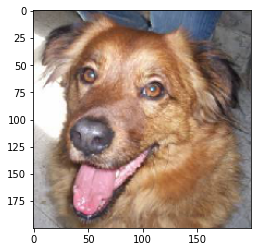

1.0


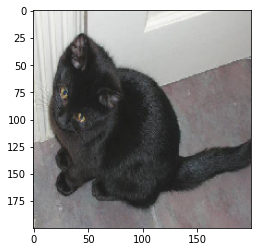

0.0


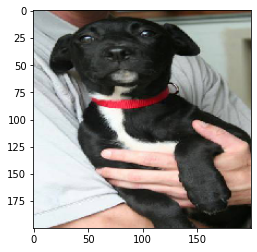

1.0


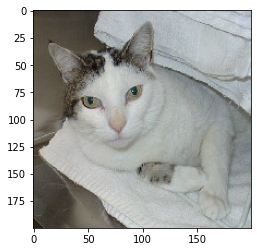

0.0


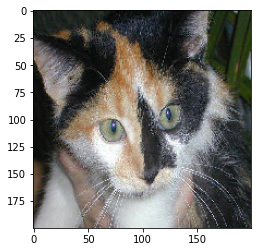

0.0


In [ ]:
# Insert your code here to obtain a sample training images batch from the train directory generator

x,y=train.next()
for i in range(5):
    # Insert your code here to visualize the training images
    image=x[i]
    visualize_image(image)
    # Insert your code here to print corresponding training label: Cat / Dog
    print (y[i])

    

# Build Model

---
Now build the model as per the best dropout probability value determined earlier. Summarize the model architecture.

---

**2 Points**

---




In [ ]:
# Insert your code here to build the CNN model as per the best dropout probability value determined earlier
model=build_cnn_model(dropout_probability = best_prob )

# Insert your code here to print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 67712)            

# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



In [ ]:
# Insert your code here to train the CNN model with best hyperparameter settings using training set and validate using the validation set (1 Point)
epochs=[]
train_accuracy=[]
train_loss=[]
val_accuracy=[]
val_loss=[]

for i in range(num_epochs):
  model.fit(train,initial_epoch=i,steps_per_epoch=100)
  # Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
  loss,acc=model.evaluate(train,steps=100)
  validation_loss,validation_accuracy=model.evaluate(validation,steps=100)
  epochs.append(i)
  train_accuracy.append(acc)
  train_loss.append(loss)
  val_accuracy.append(validation_accuracy)
  val_loss.append(validation_loss)

#Rest of code in next section

100/100 [==============================] - 35s 352ms/step - loss: 0.6867 - accuracy: 0.5572


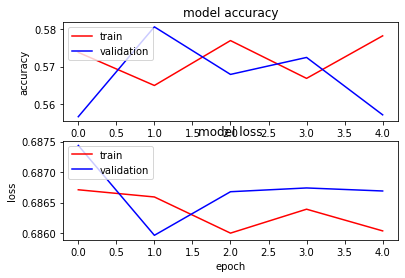

In [ ]:
# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.figure()
plt.subplot(2,1,1)
plt.plot(epochs,train_accuracy,'r')
plt.plot(epochs,val_accuracy,'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(2,1,2)
# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.plot(epochs,train_loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction

---
Fetch a sample test batch and determine the model's predictions on this batch of test images. Generate a confusion matrix and comment on the prediction statistics.



---

**Note**: Predictions would return the probability of the image belonging to class 1 (Dog). If this value is more than 0.5, assign class 1 (Dog) as the prediction. Else, assign class 0(Cat) as the prediction.

---
**2 Points**

---





Found 144 images belonging to 2 classes.


Text(0, 0.5, 'True value')

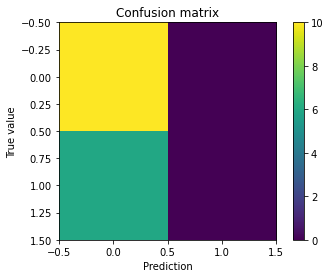

In [ ]:
# Insert your code here to obtain a sample test images batch from the test directory generator
test=get_generator(test_dir_path, best_batch_size)
x,y=test.next()
# Insert your code here to get the model's prediction probabilities
y_prob=model.predict(x,steps=100)

# Insert your code here to assign class label based on prediction probabilities
y_classes=y_prob.argmax(axis=-1)

# Insert your code here to print the confusion matrix.
con_mat=tf.math.confusion_matrix(y,y_classes,num_classes=2)

plt.imshow(con_mat)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Prediction')
plt.ylabel('True value')

Discuss the **inferences** you obtained from the confusion matrix.


---

**2 Points**


---
So judging from our confusion matrix we many true positives and very less false positives which is a good thing. However we have nearly 0 true negatives and more false negatives, which is to be expected as our model had nearly 58 % accuracy. We could have gotten a better model if we ran more iterations with a better computing machine plus some more samples.  
